In [1]:
import numpy as np
np.random.seed(2020)

import os
import tqdm
import cv2
import pandas as pd
from PIL import Image
from collections import Counter
from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K

import matplotlib.pyplot as plt
%matplotlib inline

## Preparing the data

In [2]:
def load_images(dir_path, image_list, label_list, label):
    for img in os.listdir(dir_path):
        if img.endswith('.png'):
            image = cv2.imread(dir_path + img)
            image_list.append(image)
            label_list.append(label)

In [3]:
def get_img_shapes(images):
        shapes = [list(np.array(image).shape) for image in images]
        width = [shape[0] for shape in shapes]
        height = [shape[1] for shape in shapes]
   
        return (width, height)

In [4]:
def load_data():
    parasitized = './cell_images/Parasitized/'
    uninfected = './cell_images/Uninfected/'
    
    images = []
    labels = []
    
    load_images(uninfected, images, labels, 0)
    load_images(parasitized, images, labels, 1)
    width, height = get_img_shapes(images)
    
    median_height = np.median(height).astype('int64')
    median_width = np.median(width).astype('int64')
    median_shape = (median_width, median_height)
    
    for idx, image in enumerate(images):
        images[idx] = np.array(Image.fromarray(image, 'RGB').resize(median_shape))
    
    X = np.array(images)
    y = np.array(labels)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020)
    
    if y_train.ndim == 1: y_train = to_categorical(y_train)
    if y_test.ndim == 1: y_test = to_categorical(y_test)
        
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = load_data()

In [5]:
input_shape = X_train[0].shape

In [6]:
models = []

# Visualisation

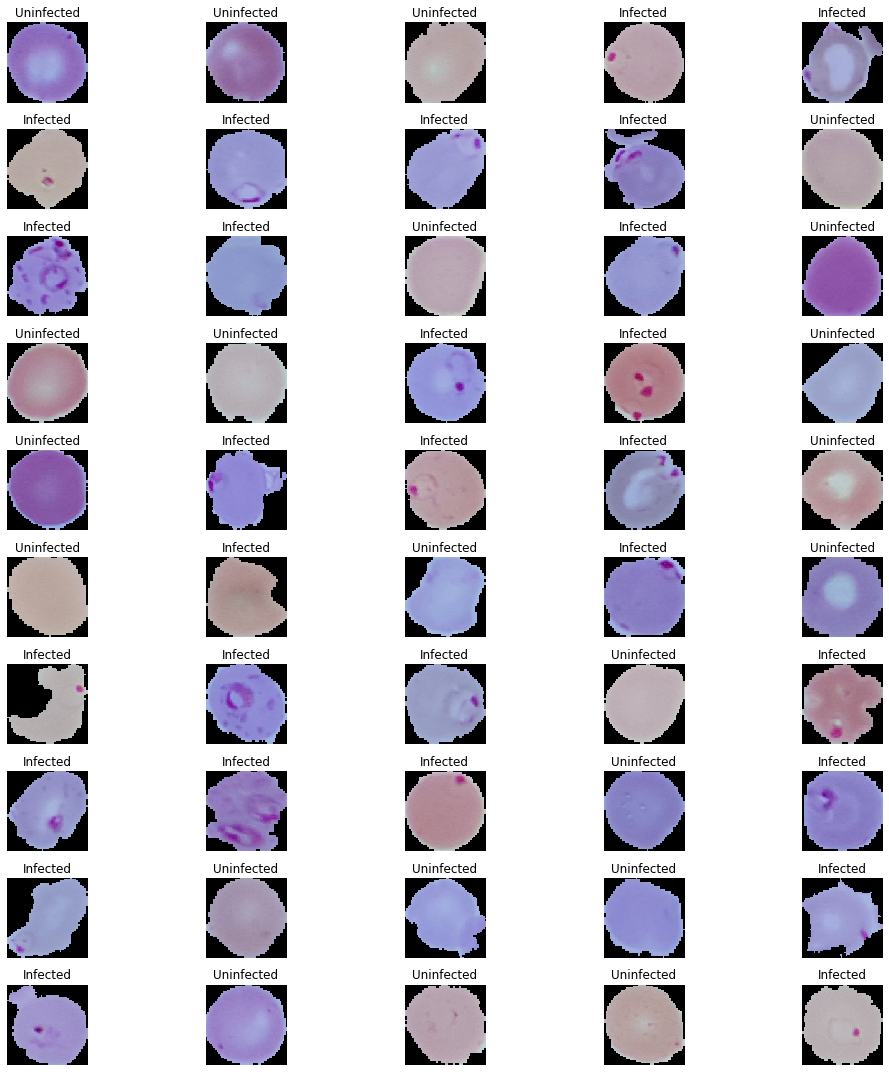

In [7]:
plt.figure(figsize=(15, 15))
for i in range(50):
    random = np.random.randint(0, len(X_train))
    plt.subplot(10, 5, i+1)
    plt.imshow(X_train[random])
    plt.title('Infected' if y_train[random][1] == 1 else 'Uninfected')
    plt.axis('off')
    
plt.tight_layout()

## Constructing the models

### Simple CNN

In [8]:
models.append(('Basic model', Sequential([
    Conv2D(filters=15, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPool2D(),
    
    Conv2D(filters=15, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    
    Conv2D(filters=15, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    
    Conv2D(filters=15, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    
    Flatten(),
    
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


### Adding dropout on fully connected layers

In [9]:
models.append(('Basic model + Dropout', Sequential([
    Conv2D(filters=15, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPool2D(),
    
    Conv2D(filters=15, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    
    Conv2D(filters=15, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    
    Conv2D(filters=15, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    
    Flatten(),
    
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])))

### Adding BatchNorm

In [10]:
models.append(('Dropout + BatchNorm', Sequential([
    Conv2D(filters=15, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPool2D(),
    
    Conv2D(filters=15, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    BatchNormalization(),
    
    Conv2D(filters=15, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    BatchNormalization(),
    
    Conv2D(filters=15, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    BatchNormalization(),
    
    Flatten(),
    
    Dense(512, activation='relu'),
    Dropout(0.3),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.1),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])))

### Testing double Conv layers

In [11]:
models.append(('Double convolutional layers', Sequential([
    Conv2D(filters=15, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    Conv2D(filters=9, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    
    Conv2D(filters=15, kernel_size=(3, 3), activation='relu'),
    Conv2D(filters=9, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    
    Conv2D(filters=15, kernel_size=(3, 3), activation='relu'),
    Conv2D(filters=9, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    
    Conv2D(filters=15, kernel_size=(3, 3), activation='relu'),
    Conv2D(filters=9, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    
    
    Flatten(),
    
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.1),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])))

### Double CL layers + BatchNorm

In [12]:
models.append(('Doblue convolutional layers + BatchNorm', Sequential([
    Conv2D(filters=15, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    Conv2D(filters=9, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    BatchNormalization(),
    
    Conv2D(filters=15, kernel_size=(3, 3), activation='relu'),
    Conv2D(filters=9, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    BatchNormalization(),
    
    Conv2D(filters=15, kernel_size=(3, 3), activation='relu'),
    Conv2D(filters=9, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    BatchNormalization(),
    
    Conv2D(filters=15, kernel_size=(3, 3), activation='relu'),
    Conv2D(filters=9, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    BatchNormalization(),
    
    
    Flatten(),
    
    Dense(512, activation='relu'),
    Dropout(0.3),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.1),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])))

### Triple convolutional layers

In [13]:
models.append(('Triple convolutional layers + BatchNorm', Sequential([
    Conv2D(filters=15, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    Conv2D(filters=9, kernel_size=(3, 3), activation='relu'),
    Conv2D(filters=6, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    BatchNormalization(),
    
    Conv2D(filters=15, kernel_size=(3, 3), activation='relu'),
    Conv2D(filters=9, kernel_size=(3, 3), activation='relu'),
    Conv2D(filters=6, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    BatchNormalization(),
    
    Conv2D(filters=15, kernel_size=(3, 3), activation='relu'),
    Conv2D(filters=9, kernel_size=(3, 3), activation='relu'),
    Conv2D(filters=6, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    BatchNormalization(),
    
    Conv2D(filters=15, kernel_size=(3, 3), activation='relu'),
    Conv2D(filters=9, kernel_size=(3, 3), activation='relu'),
    Conv2D(filters=6, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    BatchNormalization(),
    
    
    Flatten(),
    
    Dense(512, activation='relu'),
    Dropout(0.3),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.1),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])))

## Training the models

In [14]:
def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

In [15]:
results = []
for name, model in models:
    early_stopping = EarlyStopping(monitor='val_acc', patience=3, mode='auto', restore_best_weights=True)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', precision, recall])
    results.append((name, model.fit(X_train, y_train, batch_size=24, epochs=20, callbacks=[early_stopping], validation_data=(X_test, y_test))))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 19290 samples, validate on 8268 samples
Epoch 1/20
19290/19290 [==============================] - 156s 8ms/sample - loss: 7.6536 - acc: 0.5020 - precision: 0.5020 - recall: 0.5020 - val_loss: 7.7446 - val_acc: 0.4950 - val_precision: 0.4953 - val_recall: 0.4953
Epoch 2/20
19290/19290 [==============================] - 217s 11ms/sample - loss: 7.6569 - acc: 0.5021 - precision: 0.5021 - recall: 0.5021 - val_loss: 7.7446 - val_acc: 0.4950 - val_precision: 0.4953 - val_recall: 0.4953
Epoch 3/20
19290/19290 [==============================] - 159s 8ms/sample - loss: 7.6569 - acc: 0.5021 - precision: 0.5021 - recall: 0.5021 - val_loss: 7.7446 - val_acc: 0.4950 - val_precision: 0.4949 - val_recall: 0.4949
Epoch 4/20
19290/19290 [==============================] - 123s 6ms/sample - loss: 7.6569 - acc: 0.5021 - precision: 0.5021 - recall: 0.5021 - val_loss: 7.7446 - val_acc: 0.4950 - val_precisi

## Data augmentation

In [16]:
# datagen = ImageDataGenerator(
#     featurewise_center=True,
#     featurewise_std_normalization=True,
#     rotation_range=30,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     horizontal_flip=True,
#     vertical_flip=True
# )

In [17]:
#datagen.fit(X_train)

In [18]:
#double_cl_model.fit_generator(datagen.flow(X_train, y_train, batch_size=1024), steps_per_epoch=len(X_train)/1024, epochs=10)

In [19]:
#double_cl_model.evaluate(X_test, y_test)

## All models in comparison (without data augmentation)

In [20]:
def plot_loss(history, key='acc'):
    plt.plot(history.history[key])
    plt.plot(history.history['val_' + key])
    plt.xlabel('Epochs')
    plt.ylabel(key.title())
    plt.legend(['train', 'test'], loc='best')

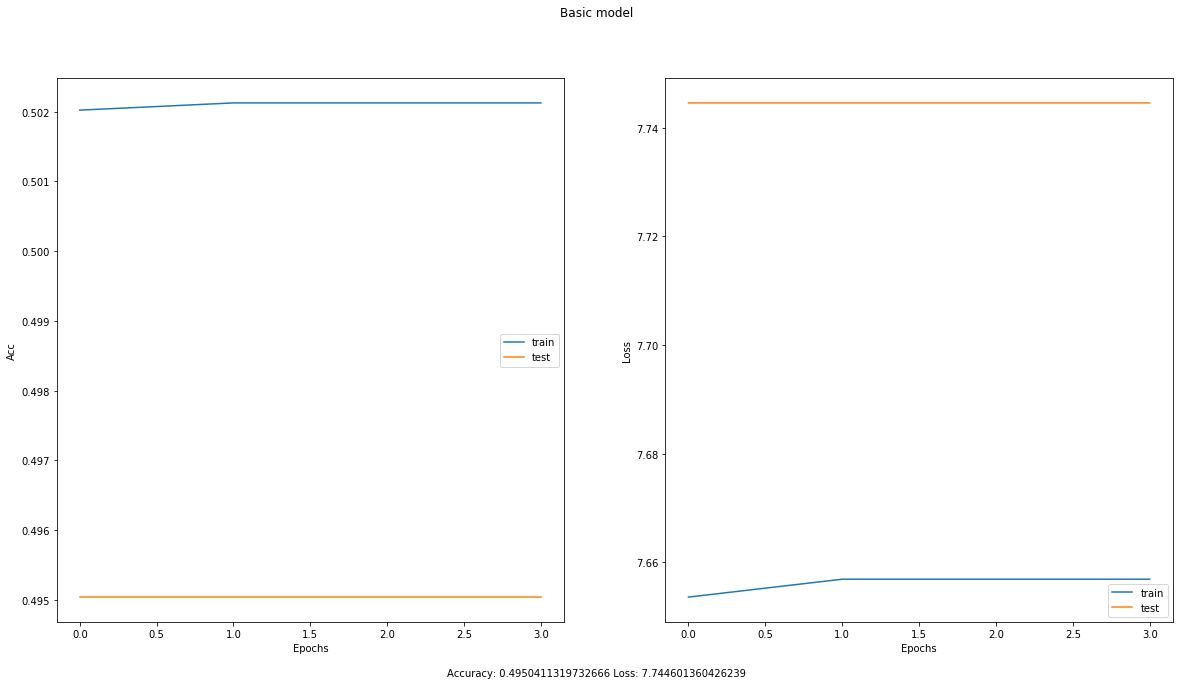

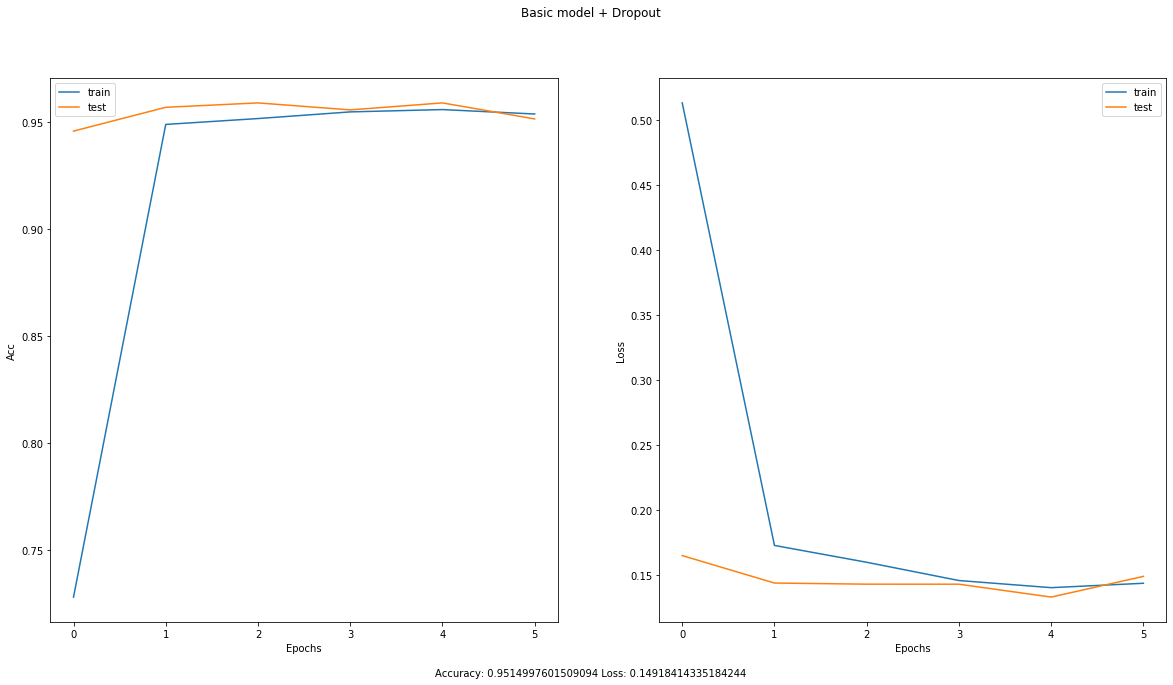

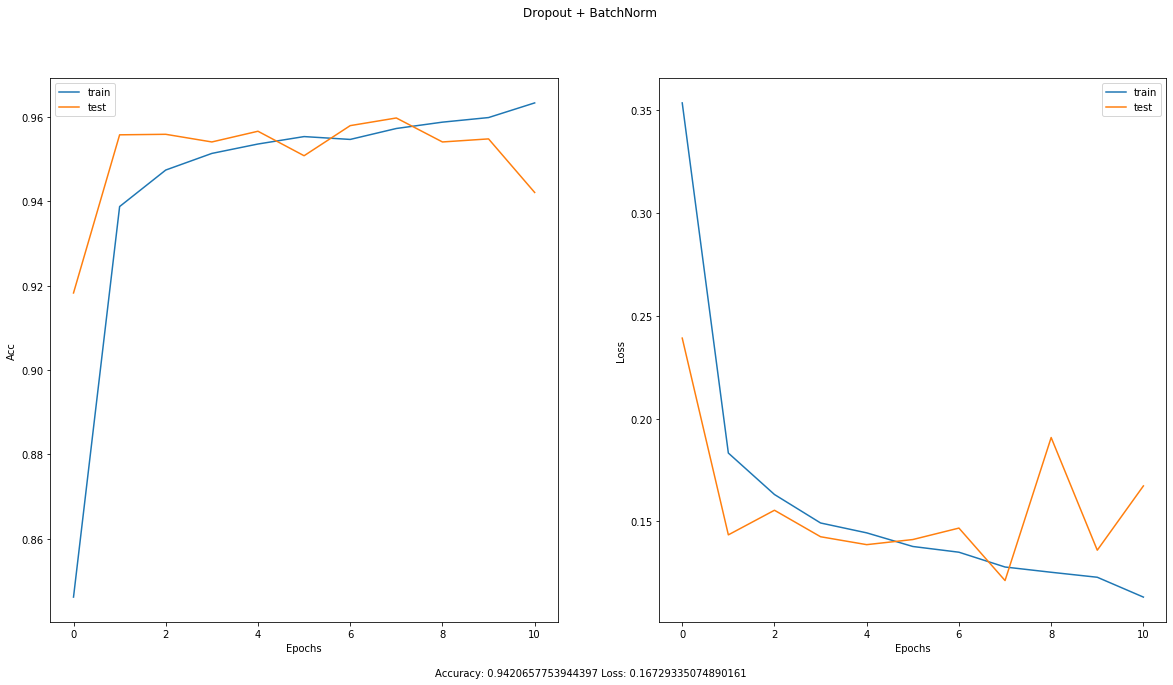

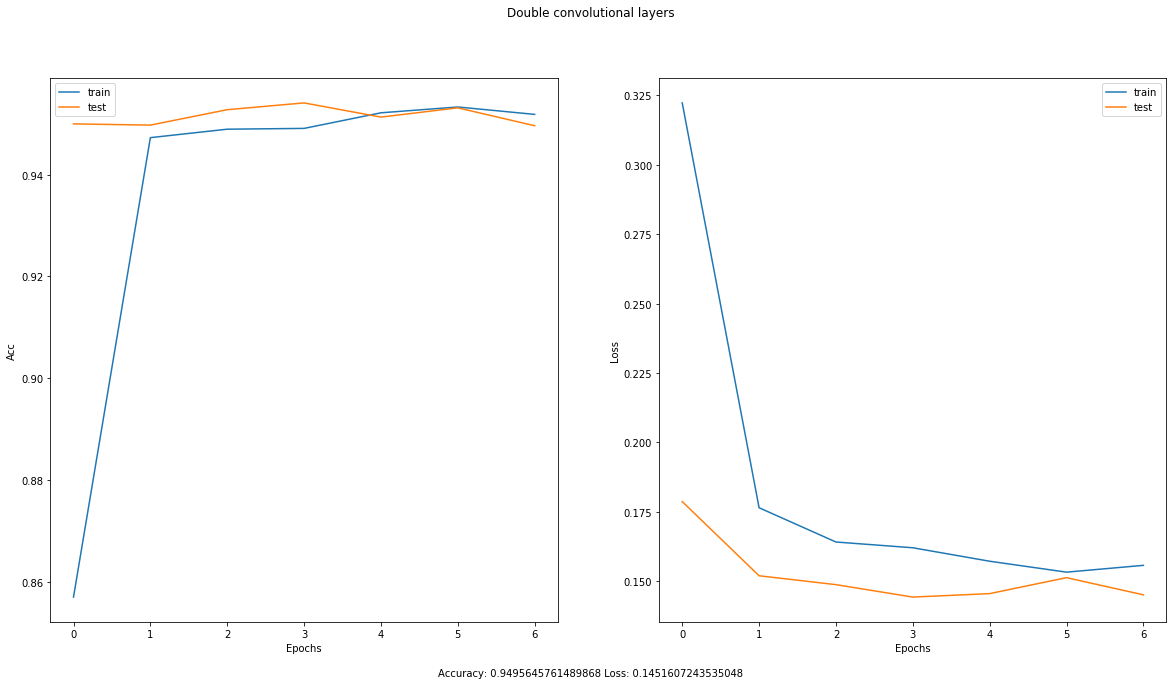

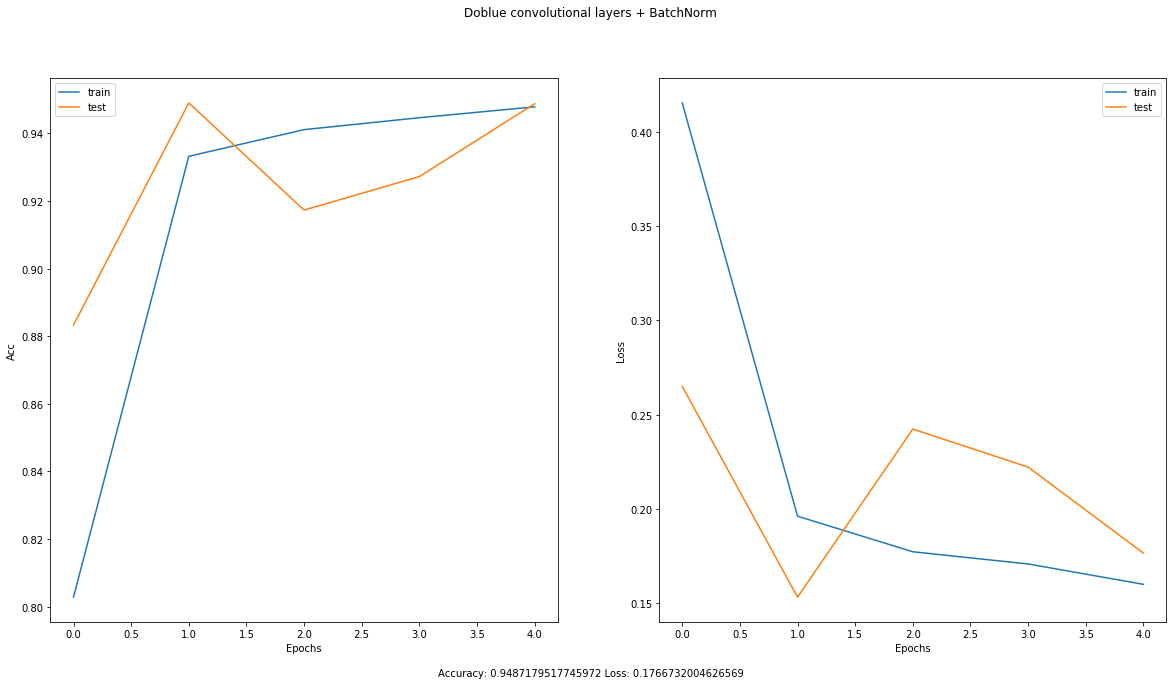

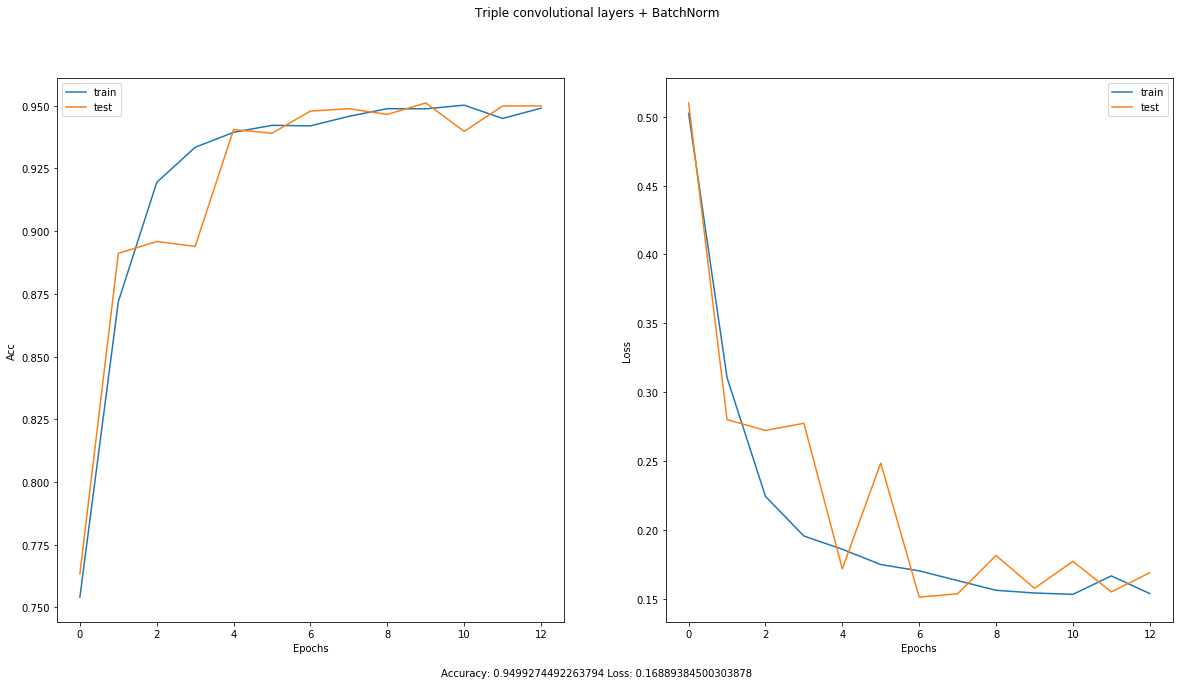

In [21]:
for name, result in results:
    fig = plt.figure(figsize=(20, 10))
    fig.suptitle(name)
    fig.text(.5, .05, 'Accuracy: {0} Loss: {1}'.format(result.history['val_acc'][-1], result.history['val_loss'][-1]), ha='center')
    plt.subplot(121)
    plot_loss(result)
    plt.subplot(122)
    plot_loss(result, key='loss')
    
plt.show()